### Codes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [2]:
G=6.67430*10**(-11)
rho=2.67 #g/cc

#### 1. Data

In [3]:
# elevation data
df=pd.read_csv('topography_data_2.csv')


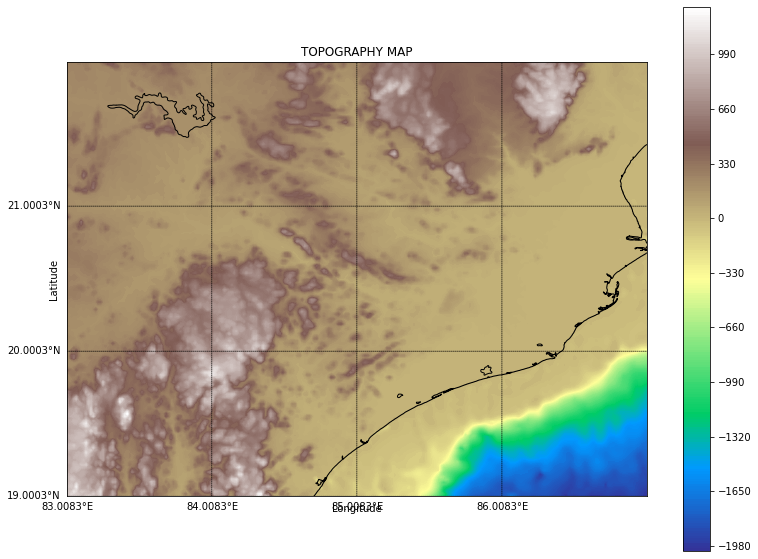

In [4]:
n=len(df.LAT.unique())
m=len(df.LON.unique())

xdat=(np.array(df.LON)).reshape(n,m)
ydat=(np.array(df.LAT)).reshape(n,m)
zdat=(np.array(df.TOPO)).reshape(n,m)
# plot 
fig, ax = plt.subplots(1,1,figsize=(13,10))
m=Basemap(llcrnrlat=df.LAT.min(),
         llcrnrlon=df.LON.min(),
         urcrnrlat=df.LAT.max(),
         urcrnrlon=df.LON.max(),resolution='f')
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.drawparallels(np.arange(df.LAT.min(),df.LAT.max()),labels=[1,0,0,0])
m.drawmeridians(np.arange(df.LON.min(),df.LON.max()),labels=[0,0,0,1])
c=ax.contourf(xdat,ydat,zdat,250,cmap='terrain')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('TOPOGRAPHY MAP')
fig.colorbar(c)

plt.show()

In [5]:

# free air anomaly data
df1=pd.read_csv('free_air_anomaly_2.csv')


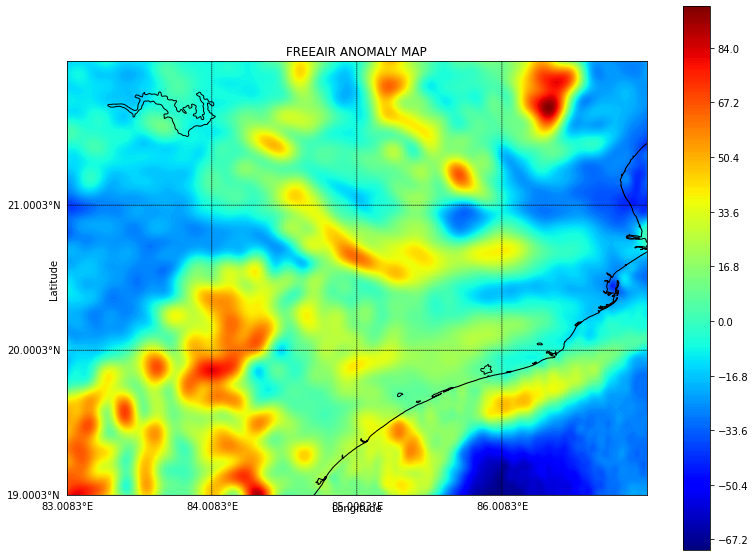

In [6]:
n=len(df1.LAT.unique())
m=len(df1.LON.unique())

xdat=(np.array(df1.LON)).reshape(n,m)
ydat=(np.array(df1.LAT)).reshape(n,m)
zdat=(np.array(df1.GRV)).reshape(n,m)
# plot
fig, ax = plt.subplots(1,1,figsize=(13,10))
m=Basemap(llcrnrlat=df1.LAT.min(),
         llcrnrlon=df1.LON.min(),
         urcrnrlat=df1.LAT.max(),
         urcrnrlon=df1.LON.max(),resolution='f')
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.drawparallels(np.arange(df1.LAT.min(),df1.LAT.max()),labels=[1,0,0,0])
m.drawmeridians(np.arange(df1.LON.min(),df1.LON.max()),labels=[0,0,0,1])
c=ax.contourf(xdat,ydat,zdat,250,cmap='jet')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('FREEAIR ANOMALY MAP')
fig.colorbar(c)

plt.show()

#### 2. Terrain correction for whole grid 

In [7]:
# Padding lattitude/Longitude
def pad_cor(df1,pad_size):
    y1=df1.LAT.unique()
    x1=df1.LON.unique()

    m=y1[1]-y1[0]
    l=y1[0]
    r=y1[-1]
    y_1=list(y1)
    for i in range(0,pad_size):
        l=l-m
        r=r+m
        y_1.append(l)
        y_1.append(r)
    y_1.sort()
    y_1=np.array(y_1)
    
    t=x1[1]-x1[0]
    d=x1[0]
    u=x1[-1]
    x_1=list(x1)
    for i in range(0,pad_size):
        d=d-m
        u=u+m
        x_1.append(d)
        x_1.append(u)
    x_1.sort()
    x_1=np.array(x_1)
    
    return x_1,y_1

In [8]:
lon_ar,lat_ar=pad_cor(df,1)

In [9]:
x_ar=[] #Longitude
y_ar=[] #Latitude
for i in range(0,len(lon_ar)-1):
    x_ar.append((lon_ar[i+1]+lon_ar[i])/2)
for i in range(0,len(lat_ar)-1):
    y_ar.append((lat_ar[i+1]+lat_ar[i])/2)   

In [10]:
x,y=np.meshgrid(x_ar,y_ar)

In [11]:
a1=[]
for i in range(0,len(y_ar)-1):
    for j in range(0,len(x_ar)-1):
        a1.append([y_ar[i],y_ar[i+1],x_ar[j],x_ar[j+1]])

In [12]:
# limits of prism
y_1=[]
y_2=[]
x_1=[]
x_2=[]

for i in range(0,len(a1)):
    y_1.append(a1[i][0]) #lat ll
    y_2.append(a1[i][1]) #lat ul
    x_1.append(a1[i][2]) #lon ll
    x_2.append(a1[i][3]) #lon ul

In [13]:
tr=pd.DataFrame()
tr['x1']=x_1
tr['x2']=x_2
tr['y1']=y_1
tr['y2']=y_2
tr['z']=df.TOPO
tr

,x1,x2,y1,y2,z
0,82.999929,83.016668,18.991929,19.008671,863.000000
1,83.016668,83.033405,18.991929,19.008671,943.095565
2,83.033405,83.050141,18.991929,19.008671,948.966516
3,83.050141,83.066877,18.991929,19.008671,955.260913
4,83.066877,83.083614,18.991929,19.008671,979.220462
...,...,...,...,...,...
43195,86.932986,86.949723,21.988829,22.005571,56.751878
43196,86.949723,86.966459,21.988829,22.005571,66.945804
43197,86.966459,86.983195,21.988829,22.005571,67.057803
43198,86.983195,86.999932,21.988829,22.005571,59.045937


In [14]:
#lower limit y -lat
yll=np.array(y_1) 
#upper limit y -lat
yul=np.array(y_2)
#lower limit x -lon
xll=np.array(x_1)
#upper limit x -lon
xul=np.array(x_2)
z=np.array(df.TOPO)

In [15]:
# converting to utm coordinates
import utm
x=utm.from_latlon(yll,xll)
y=utm.from_latlon(yul,xul)


x_1=x[1] #easting
y_1=x[0] #northing
x_2=y[1] #easting
y_2=y[0] #northing

**Function for terrain Correction**

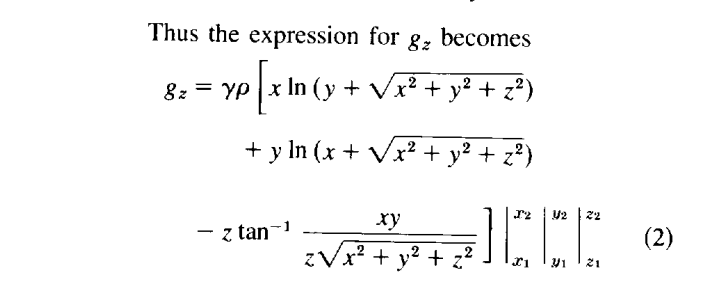

In [16]:
# function for terrain correction
def terrain(x_1,x_2,y_1,y_2,z):
    
    a1=x_1*np.log(y_1+np.sqrt(x_1**2+y_1**2))
    b1=y_1*np.log(x_1+np.sqrt(x_1**2+y_1**2))  
    g_z1=G*rho*(a1+b1)

    
    a2=x_2*np.log(y_2+np.sqrt(x_2**2+y_2**2+z**2))
    b2=y_2*np.log(x_2+np.sqrt(x_2**2+y_2**2+z**2))
    c=z*np.arctan(x_2*y_2/(z*np.sqrt(x_2**2+y_2**2+z**2)))
    
    g_z2=G*rho*(a2+b2-c)
        
    g_z=(g_z2-g_z1)*10**5 #in mgal

    return g_z

In [17]:
g_z=terrain(x_1,x_2,y_1,y_2,z)

In [18]:
for i in range(0,len(df.TOPO)):
    if df.TOPO[i]>=0:
        g_z[i]=g_z[i]
    elif df.TOPO[i]<0:
        g_z[i]=(-1)*g_z[i]

In [19]:
tr['trn_cor']=g_z 
tr.describe()

,x1,x2,y1,y2,z,trn_cor
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,84.999932,85.016668,20.490379,20.507121,101.572600,0.692257
std,1.159535,1.159535,0.869960,0.869960,502.687557,0.762839
min,82.999929,83.016668,18.991929,19.008671,-1995.194833,-1.044551
25%,83.999932,84.016668,19.741154,19.757896,14.529265,1.020336
50%,84.999932,85.016668,20.490379,20.507121,160.684463,1.029487
75%,85.999932,86.016668,21.239604,21.256346,309.587141,1.036079
max,86.999932,87.016671,21.988829,22.005571,1274.683764,1.044384


#### 3. Computing Bouguer anomaly

In [20]:
#bouguer correction
g_b=np.array(0.04192*2.67*df.TOPO) #gives value in mgal
bgr_an=np.array(df1.GRV-g_b+g_z)
bgr_an

n=len(df1.LAT.unique())
m=len(df1.LON.unique())

xdat=(np.array(df1.LON)).reshape(n,m)
ydat=(np.array(df1.LAT)).reshape(n,m)
zdat=bgr_an.reshape(n,m)

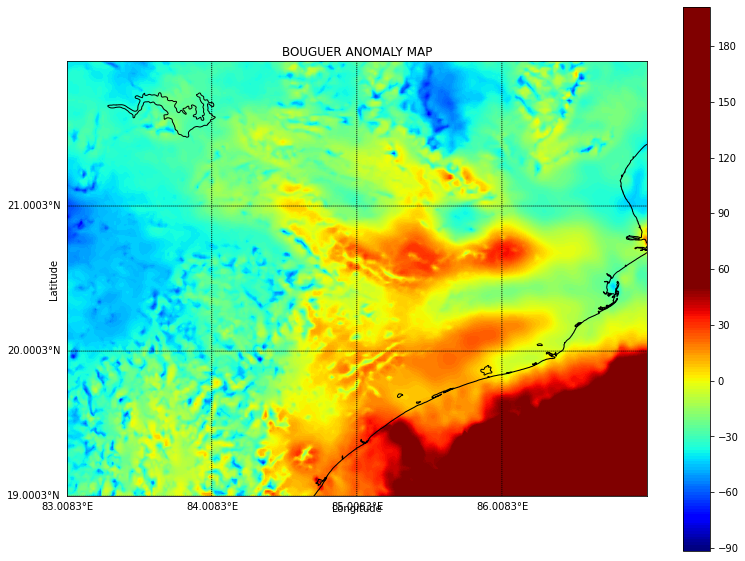

In [21]:
# plot
fig, ax = plt.subplots(1,1,figsize=(13,10))
m=Basemap(llcrnrlat=df1.LAT.min(),
         llcrnrlon=df1.LON.min(),
         urcrnrlat=df1.LAT.max(),
         urcrnrlon=df1.LON.max(),resolution='f')
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.drawparallels(np.arange(df1.LAT.min(),df1.LAT.max()),labels=[1,0,0,0])
m.drawmeridians(np.arange(df1.LON.min(),df1.LON.max()),labels=[0,0,0,1])

c=ax.contourf(xdat,ydat,zdat,250,cmap='jet',vmin=-90,vmax=50)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('BOUGUER ANOMALY MAP')
fig.colorbar(c)

plt.show()